Populating the interactive namespace from numpy and matplotlib


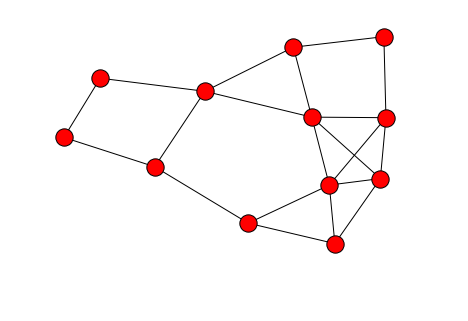

In [1]:
import numpy as np
import networkx as nx
%pylab inline

G = nx.Graph()
G.add_edges_from([(1, 2),
                  (1, 3),
                  (1, 5),
                  (1, 7),
                  (2, 1),
                  (2, 3),
                  (2, 4),
                  (3, 1),
                  (3, 2),
                  (3, 4),
                  (3, 5),
                  (3, 7),
                  (4, 2),
                  (4, 3),
                  (4, 10),
                  (5, 1),
                  (5, 3),
                  (5, 6),
                  (5, 7),
                  (6, 5),
                  (6, 8),
                  (7, 1),
                  (7, 3),
                  (7, 5),
                  (7, 8),
                  (7, 9),
                  (8, 6),
                  (8, 7),
                  (8, 9),
                  (9, 7),
                  (9, 8),
                  (9, 10),
                  (9, 11),
                  (10, 4),
                  (10, 9),
                  (10, 12),
                  (11, 9),
                  (11, 12),
                  (12, 10),
                  (12, 11),
                 ])
nx.set_node_attributes(G, 'partition', {1: '0', 2: '0', 3: '0', 4: '0',
                                        5: '1', 6: '1', 7: '1', 8: '1',
                                        9: '2', 10: '2', 11: '2', 12: '2',
                                       })
assignments = np.asarray([-1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2])

pos = nx.spring_layout(G, scale=5)
nx.draw(G, pos, font_size=8)
pylab.show()

In [2]:
def base_metrics(G):
    """
    This algorithm calculates the number of edges cut and scores the communication steps. It gets
    passed a networkx graph with a 'partition' attribute defining the partition of the node.

    Communication steps described on slide 11:
    https://www.cs.fsu.edu/~engelen/courses/HPC-adv/GraphPartitioning.pdf
    """
    steps = 0
    edges_cut = 0
    seen = []
    for n in G.nodes_iter():
        partition_seen = []
        for e in G.edges_iter(n):
            left = e[0]
            right = e[1]
            left_partition = G.node[left]['partition']
            right_partition = G.node[right]['partition']

            if left_partition == right_partition:
                # right node within same partition, skip
                continue

            if (n,right) not in seen:
                # dealing with undirected graphs
                seen.append((n,right))
                seen.append((right,n))

                if left_partition != right_partition:
                    # right node in different partition
                    edges_cut += 1

            if left_partition != right_partition and right_partition not in partition_seen:
                steps += 1
                partition_seen.append(right_partition)

    return (edges_cut, steps)

In [3]:
edges_cut, steps = base_metrics(G)

print("\nMetrics")
print("-------\n")
print("Edges cut: {}".format(edges_cut))
print("Communication volume: {}".format(steps))


Metrics
-------

Edges cut: 7
Communication volume: 9
